<a href="https://www.kaggle.com/ranjeetshrivastav/tabular-playground-series-mar-2021?scriptVersionId=88453963" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2021/train.csv
/kaggle/input/tabular-playground-series-mar-2021/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv(r'../input/tabular-playground-series-mar-2021/train.csv')
test = pd.read_csv(r'../input/tabular-playground-series-mar-2021/test.csv')

In [4]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [5]:
train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

In [6]:
train.nunique()

id        300000
cat0           2
cat1          15
cat2          19
cat3          13
cat4          20
cat5          84
cat6          16
cat7          51
cat8          61
cat9          19
cat10        299
cat11          2
cat12          2
cat13          2
cat14          2
cat15          4
cat16          4
cat17          4
cat18          4
cont0     299874
cont1     299861
cont2     299872
cont3     299818
cont4     299876
cont5     299791
cont6     299843
cont7     299880
cont8     299849
cont9     299859
cont10    299823
target         2
dtype: int64

checking if any null values

In [7]:
train.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

looks like there is none.
let's see what types of data present in data:

In [8]:
train.dtypes

id          int64
cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
target      int64
dtype: object

using **label encoder** for convert object datatypes:

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(19):
    le.fit(list(train['cat'+str(i)])+list(test['cat'+str(i)]))
    train['cat'+str(i)] = le.transform(train['cat'+str(i)])
    test['cat'+str(i)] = le.transform(test['cat'+str(i)])

In [10]:
train.dtypes

id          int64
cat0        int64
cat1        int64
cat2        int64
cat3        int64
cat4        int64
cat5        int64
cat6        int64
cat7        int64
cat8        int64
cat9        int64
cat10       int64
cat11       int64
cat12       int64
cat13       int64
cat14       int64
cat15       int64
cat16       int64
cat17       int64
cat18       int64
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
target      int64
dtype: object

In [11]:
test.dtypes

id          int64
cat0        int64
cat1        int64
cat2        int64
cat3        int64
cat4        int64
cat5        int64
cat6        int64
cat7        int64
cat8        int64
cat9        int64
cat10       int64
cat11       int64
cat12       int64
cat13       int64
cat14       int64
cat15       int64
cat16       int64
cat17       int64
cat18       int64
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
dtype: object

In [12]:
X= train.drop('target',axis=1)
y = train['target']

let's use **train_test_split** to avoid overfitting:

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
X_train.shape,X_test.shape

((210000, 31), (90000, 31))

checking for correlation b/w columns:

In [15]:
X_train.corr()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
id,1.000000,0.001843,0.000560,-0.002020,-0.002082,-0.002541,0.001849,-0.003528,-0.001056,-0.004364,...,-0.002460,-0.002699,-0.000727,0.001949,-0.001028,0.001147,-0.001724,-0.003746,-0.002650,-0.001454
cat0,0.001843,1.000000,-0.144691,-0.217826,-0.017564,-0.046631,0.103751,-0.091751,0.130271,-0.028018,...,0.005064,0.020882,0.122928,0.138196,0.041188,-0.023669,0.060616,-0.102696,0.064016,0.025550
cat1,0.000560,-0.144691,1.000000,0.047745,-0.019110,0.025095,0.079099,0.074903,-0.011435,-0.088491,...,0.000633,-0.011408,-0.006007,0.002597,0.108462,0.118806,-0.042568,0.049463,-0.003520,-0.060261
cat2,-0.002020,-0.217826,0.047745,1.000000,-0.023025,-0.047354,-0.218283,0.107548,-0.160945,0.111335,...,-0.118680,-0.129895,-0.182394,-0.131455,-0.045970,-0.022188,-0.141814,-0.116449,-0.010276,-0.078786
cat3,-0.002082,-0.017564,-0.019110,-0.023025,1.000000,0.031841,0.028927,-0.002726,0.030199,0.025559,...,0.099637,0.119866,0.079578,0.079873,0.026983,-0.049003,0.125045,0.064822,0.091611,0.143143
cat4,-0.002541,-0.046631,0.025095,-0.047354,0.031841,1.000000,0.121559,-0.025838,0.022229,-0.114905,...,0.489017,0.462912,-0.123818,0.014900,0.261566,0.368012,0.111767,0.434869,0.112385,0.023066
cat5,0.001849,0.103751,0.079099,-0.218283,0.028927,0.121559,1.000000,-0.075291,0.138126,-0.115177,...,0.181690,0.203041,0.215431,0.203228,0.140951,0.094378,0.193145,0.202141,0.098718,0.142104
cat6,-0.003528,-0.091751,0.074903,0.107548,-0.002726,-0.025838,-0.075291,1.000000,-0.059590,0.003626,...,-0.041660,-0.063894,-0.105518,-0.018673,-0.001436,0.024906,-0.120450,-0.022367,-0.068175,-0.098230
cat7,-0.001056,0.130271,-0.011435,-0.160945,0.030199,0.022229,0.138126,-0.059590,1.000000,0.003261,...,0.101332,0.127829,0.181643,0.271040,-0.003579,-0.069473,0.159310,0.026998,0.102600,0.165406
cat8,-0.004364,-0.028018,-0.088491,0.111335,0.025559,-0.114905,-0.115177,0.003626,0.003261,1.000000,...,-0.065437,-0.044846,0.074422,-0.012843,-0.155959,-0.243316,0.077177,-0.052432,0.095343,0.152360


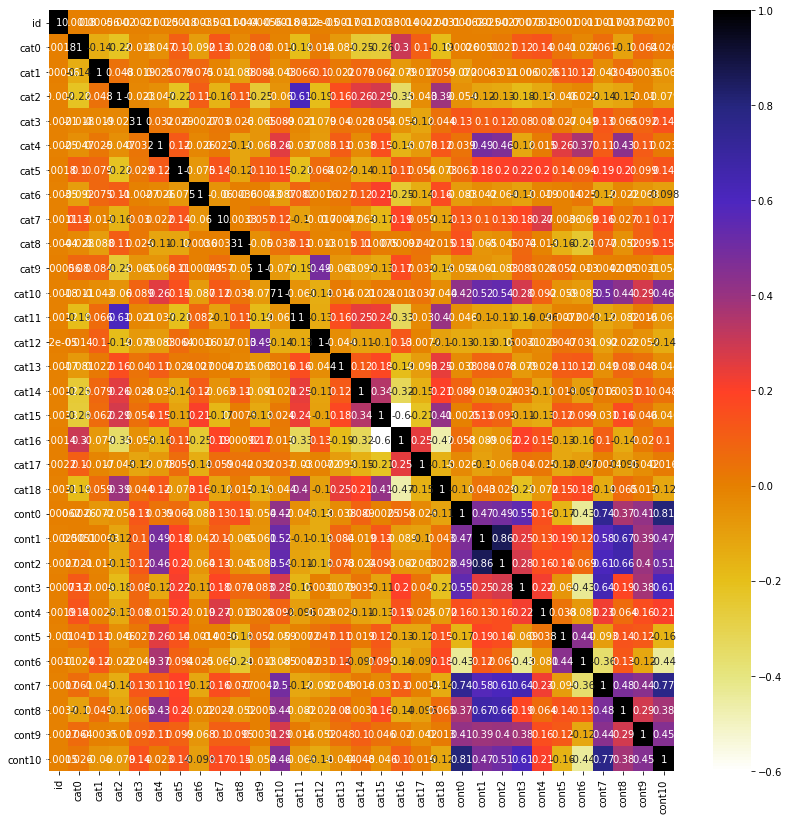

In [16]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(14,14))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(X_train,0.6)
len(set(corr_features))

5

In [19]:
corr_features

{'cat11', 'cont10', 'cont2', 'cont7', 'cont8'}

In [20]:
X_train.drop('id',axis=1)
X_test.drop('id',axis=1)
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cat16,cat17,cat18,cont0,cont1,cont3,cont4,cont5,cont6,cont9
112692,188160,0,6,12,0,5,2,2,8,48,...,1,1,1,0.670207,0.475965,0.308699,0.254369,0.071346,0.329239,0.514018
19498,32630,0,8,0,0,6,33,0,14,38,...,3,3,1,0.624572,0.630822,0.594514,0.680378,0.680145,0.544423,0.587635
31689,52938,1,8,3,0,4,33,0,13,38,...,3,3,1,0.364256,0.248830,0.348481,0.345248,0.487943,0.523171,0.332319
231780,386430,0,1,2,0,5,33,0,46,45,...,3,3,1,0.475850,0.416180,0.305673,0.291230,0.357305,0.944479,0.278145
4298,7171,0,10,0,0,4,33,0,30,55,...,3,3,1,0.972405,0.712700,0.849230,0.829192,0.619486,0.137037,0.500671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289193,482007,0,8,6,3,5,33,0,8,35,...,2,3,1,0.488562,0.338524,0.149197,0.231020,0.813114,0.547923,0.582875
159362,265845,0,5,0,2,4,33,0,14,60,...,3,3,1,0.959685,0.485126,0.827813,0.213334,0.073207,0.227811,0.709861
209536,349365,0,8,0,0,4,33,2,30,38,...,3,3,1,0.243004,0.333341,0.336703,0.353876,0.680909,0.458770,0.468147
156364,260882,1,9,0,1,4,33,0,39,4,...,3,3,1,0.294378,0.229212,0.256626,0.617638,0.276864,0.443613,0.321051


training xgbclassifier model:

In [21]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200,
                     learning_rate=0.2,
                     gamma=0.1,
                     max_depth=6)
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:27:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
pred = model.predict_proba(X_test)[:,1]

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.8887933337206086

predicting for **test** dataset and storing prediction into csv file:

In [24]:
test_pred = model.predict_proba(test)[:,1]
test['target'] = test_pred
submission =test[['id','target']]
submission.to_csv('submission.csv',index=False)

well, i'm doing any hyper parameters tuning, i'll keep it simple.

thanks.